<h1>Lecture 7, October 20, 2025 </h1>

<h1> Forecasting VAR models</h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

In [3]:
# install.packages("quantmod")
# install.packages("fredr")
# install.packages("ggfortify")
# install.packages('urca')
# install.packages("dynlm")
# install.packages("stargazer")
# install.packages("pracma")
# install.packages("dLagM")
# install.packages("gets")
# install.packages("car")
# install.packages("lmtest")
# install.packages("vars")
options(warn=-1)

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">  

# Roadmap
    

Today’s lecture will follow an **exercise-based format** designed to combine theory, coding, and interpretation in a hands-on way.  
We’ll complete **five structured exercises**, each taking approximately **15 minutes**, followed by a short **discussion and debrief**.  


### **Goal for today**
- Revisit and reinforce what we did **last week** (lag selection, identification, interpretation).

### **Expected outcomes**
By the end of the session, you should be able to:
- Prepare macroeconomic time series for VAR analysis.
- Estimate both reduced-form VARs and identified SVARs.
- Generate and interpret **impulse response functions (IRFs)**.    
    
</div>    

In [5]:
# Import the dataset from a CSV file downloaded from FRED
cpi = read.csv("CPIAUCSL.csv")
urate = read.csv("UNRATE.csv")

# Display the first few observations to data check stzructure
head(cpi)
head(urate)

# Display the last few observations to data check structure
tail(cpi)
tail(urate)

# Convert the second column of the dataset into a time series object
# Exclude the last observation because the most recent value is "Pending" (NA after import)
tscpi = ts(cpi[1:(nrow(cpi)-1), 2], frequency = 4, start = c(1947, 1))
tsurate = ts(urate[1:(nrow(urate)-1), 2], frequency = 4, start = c(1948, 1))

# Define inflation
tsinf = diff(log(tscpi)) * 100

# Inflation is stationary in levels
dinf = tsinf

# Unemployment rate is stationary in levels
durate = tsurate

,observation_date,CPIAUCSL
,<chr>,<dbl>
1,1947-01-01,21.700
2,1947-04-01,22.010
3,1947-07-01,22.490
4,1947-10-01,23.127
5,1948-01-01,23.617
6,1948-04-01,23.993


,observation_date,UNRATE
,<chr>,<dbl>
1,1948-01-01,3.7
2,1948-04-01,3.7
3,1948-07-01,3.8
4,1948-10-01,3.8
5,1949-01-01,4.7
6,1949-04-01,5.9


,observation_date,CPIAUCSL
,<chr>,<dbl>
310,2024-04-01,313.096
311,2024-07-01,314.183
312,2024-10-01,316.539
313,2025-01-01,319.492
314,2025-04-01,320.800
315,2025-07-01,NA


,observation_date,UNRATE
,<chr>,<dbl>
306,2024-04-01,4.0
307,2024-07-01,4.2
308,2024-10-01,4.1
309,2025-01-01,4.1
310,2025-04-01,4.2
311,2025-07-01,NA


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">  

# Exercise 1 (15'):
<p>For US real GDP:</p>
<ol>
  <li>Import the data.</li>
  <li>Test for a unit root.</li>
  <li>If necessary, transform it into a stationary series.</li>
</ol>
    
</div>
    
</div>   

In [15]:
gdp = read.csv("GDPC1.csv")
head(gdp)
tail(gdp)
colnames(gdp)

tsgdp = ts(gdp[, 2], frequency = 4, start = c(1947, 1))

,observation_date,GDPC1
,<chr>,<dbl>
1,1947-01-01,2182.681
2,1947-04-01,2176.892
3,1947-07-01,2172.432
4,1947-10-01,2206.452
5,1948-01-01,2239.682
6,1948-04-01,2276.690


,observation_date,GDPC1
,<chr>,<dbl>
309,2024-01-01,23082.12
310,2024-04-01,23286.51
311,2024-07-01,23478.57
312,2024-10-01,23586.54
313,2025-01-01,23548.21
314,2025-04-01,23770.98


[1] "observation_date" "GDPC1"

In [11]:
library(urca)

In [16]:
summary(ur.df(tsgdp, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1797.63   -32.40     3.44    46.24  1107.13 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 16.194420  18.513223   0.875   0.3824  
z.lag.1     -0.004476   0.007428  -0.603   0.5472  
tt           0.690343   0.521043   1.325   0.1862  
z.diff.lag  -0.147127   0.057156  -2.574   0.0105 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 148.1 on 301 degrees of freedom
Multiple R-squared:  0.05995,	Adjusted R-squared:  0.05058 
F-statistic: 6.399 on 3 and 301 DF,  p-value: 0.0003245


Value of test-statistic is: -0.6026 28.452 7.7571 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3.13
phi2  6.1

we reject the null of phi2 that the trend is not significant (99%).

we reject the null of phi3 to the 90% level.

we fail to reject the null that the series has a unit root, so we difference it once.

because we are dealing with gdp data, we take the log because it is it is strictly positive and shows exponential growth and (or) shows heteroskedasticity (variance increasing over time), so we take log before differencing.

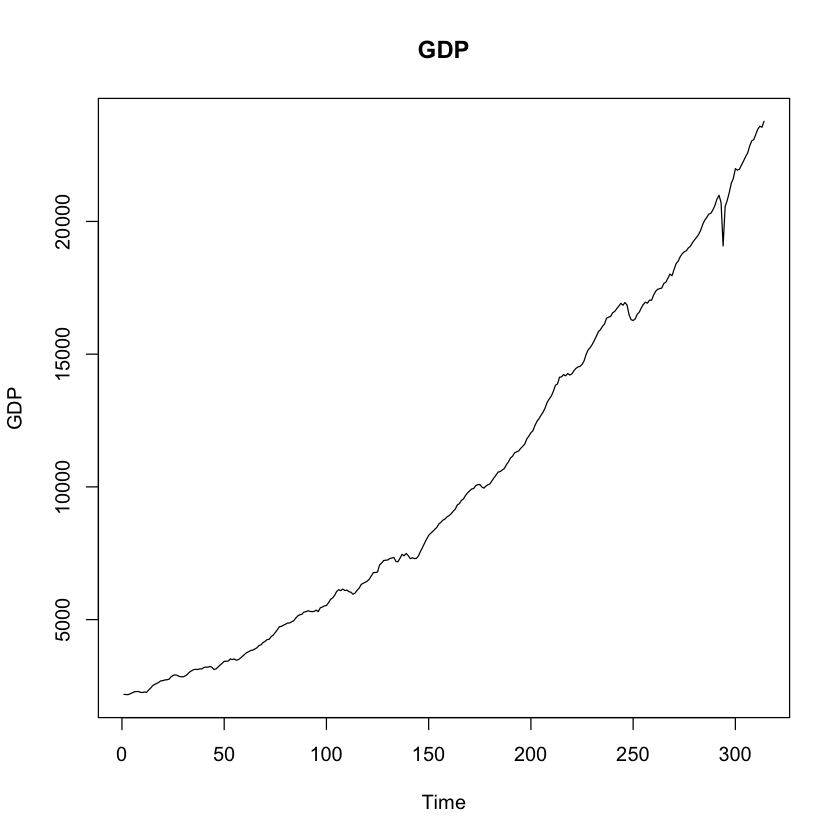

In [ ]:
plot(gdp$GDPC1, type='l', main='GDP', ylab='GDP', xlab='Time')

# remember to plot axes labels and title and UNITS

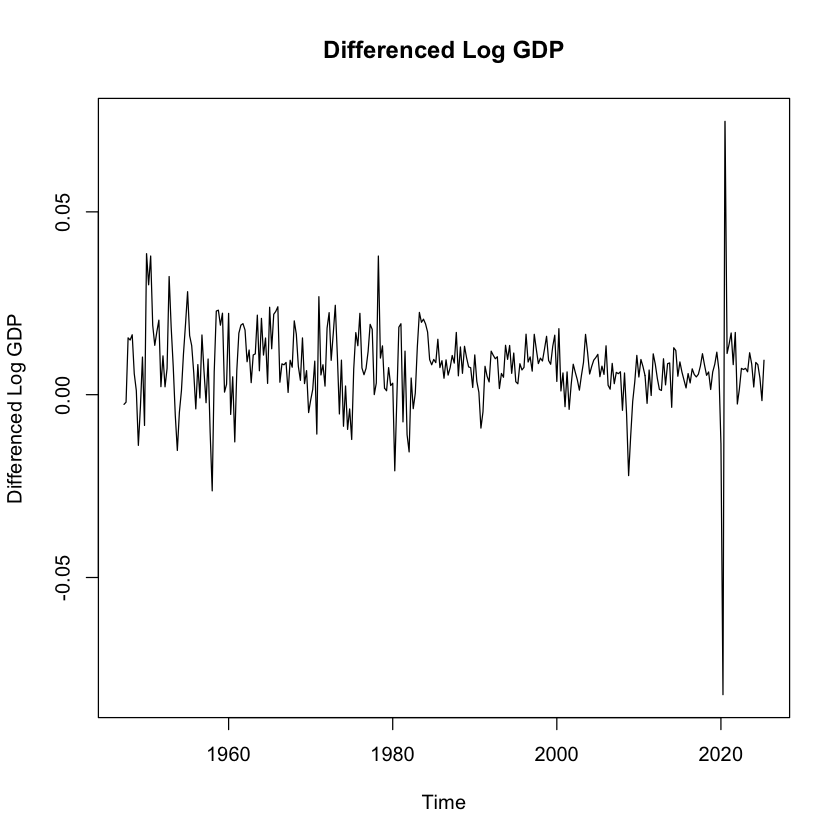

In [19]:
lgdp = log(tsgdp)
dgdp = diff(lgdp)

plot(dgdp, type='l', main='Differenced Log GDP', ylab='Differenced Log GDP', xlab='Time')

In [21]:
summary(ur.df(dgdp, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085597 -0.004079  0.000463  0.004678  0.079215 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.086e-03  1.540e-03   5.902 9.71e-09 ***
z.lag.1     -8.236e-01  7.634e-02 -10.789  < 2e-16 ***
tt          -1.677e-05  7.285e-06  -2.302    0.022 *  
z.diff.lag  -8.490e-02  5.701e-02  -1.489    0.137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01094 on 300 degrees of freedom
Multiple R-squared:  0.4548,	Adjusted R-squared:  0.4493 
F-statistic: 83.42 on 3 and 300 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.7892 38.8221 58.2283 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3

we reject all nulls at 99% level, so the differenced log gdp is stationary.

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
<h1>Exercise 2 (15'):</h1>

<p>Consider two reduced-form VAR models:</p>
<ol type="i">
  <li type="i">a two-variable system of real GDP and the unemployment rate in the US;</li>
  <li type="i">a three-variable system of real GDP, inflation, and the unemployment rate in the US.</li>
</ol>

<p>For each system:</p>
<ol>
  <li>Create a joint time-series object and report the number of observations.</li>
    <li> Use AIC to determine the optimal number of lags. </li>
  <li>Write out the full system of equations assuming 2 lags for 2 variable system, and 3 lags for three variable system.</li>
    <li> Rerwrite the system using matrices.</li>  
  <li>Compute the total number of parameters to be estimated.</li>
</ol>
</div>


In [24]:
# Align series on common dates (keep only overlapping periods)
data2 = ts.intersect(dgdp, durate)           # 2-variable system
data3 = ts.intersect(dgdp, durate, dinf)     # 3-variable system

# Number of overlapping observations in each system
nrow(data2)
nrow(data3)

head(data2)
head(data3)

library(vars)

out = VARselect(data2, lag.max = 8, type = "const")

# pretty print
library(knitr)
kable(out$selection)

library(vars)

out = VARselect(data3, lag.max = 8, type = "const")
kable(out$selection)

[1] 310

[1] 310

dgdp,durate
0.014948096,3.7
0.016388742,3.7
0.005728742,3.8
0.001132224,3.8
-0.013861770,4.7
-0.003402356,5.9


dgdp,durate,dinf
0.014948096,3.7,2.0966026
0.016388742,3.7,1.5795329
0.005728742,3.8,1.6698053
0.001132224,3.8,-0.9223866
-0.013861770,4.7,-0.9560302
-0.003402356,5.9,-0.1086502




|       |  x|
|:------|--:|
|AIC(n) |  2|
|HQ(n)  |  2|
|SC(n)  |  2|
|FPE(n) |  2|



|       |  x|
|:------|--:|
|AIC(n) |  3|
|HQ(n)  |  2|
|SC(n)  |  1|
|FPE(n) |  3|

In [27]:
library(vars)

model.VAR1 = VAR(data2, p = 1, type = "const")

irf.VAR1 = irf(
  model.VAR1,                              # fitted VAR object
  impulse  = c("dgdp", "durate"),# variable(s) to shock
  response = c("dgdp", "durate"),# variables whose responses you trace
  n.ahead  = 8,                            # horizons ahead to compute IRFs
  ortho    = FALSE,                        # FALSE ⇒ generalized (reduced-form) shocks; ordering irrelevant
  boot     = TRUE,                         # compute bootstrap confidence bands
  runs     = 1000,                         # number of bootstrap replications (used if boot=TRUE)
  ci       = 0.95,                         # confidence level for the bands
  cumulative = FALSE                       # FALSE: non-cumulative IRFs; TRUE: cumulated responses
)

irf.VAR1$irf 

dgdp,durate
1.000000000,0.000000
0.158186884,-16.608300
0.002090339,-17.590089
-0.023957741,-15.882110
-0.025719828,-13.910731
-0.023276486,-12.105397
-0.020397174,-10.519501
-0.017751899,-9.138545
-0.015426626,-7.938337
dgdp,durate


so bc AIC(n) = 2 for both systems, we select 2 lags for the 2-variable system and 2 lags for the 3-variable system.

The full system of equations assuming 2 lags for 2 variable system is:
$$
\begin{align*}
dgdp_t &= c_1 + \phi_{11,1} dgdp_{t-1} + \phi_{11,2} dgdp_{t-2} + \phi_{12,1} durate_{t-1} + \phi_{12,2} durate_{t-2} + u_{1t} \\
durate_t &= c_2 + \phi_{21,1} dgdp_{t-1} + \phi_{21,2} dgdp_{t-2} + \phi_{22,1} durate_{t-1} + \phi_{22,2} durate_{t-2} + u_{2t}
\end{align*}
$$

Matrix form:
$$
\begin{bmatrix}
dgdp_t \\
durate_t
\end{bmatrix}
=
\begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
+
\begin{bmatrix} \phi_{11,1} & \phi_{12,1} \\ \phi_{21,1} & \phi_{22,1} \end{bmatrix}
\begin{bmatrix} dgdp_{t-1} \\ durate_{t-1} \end{bmatrix}
+
\begin{bmatrix} \phi_{11,2} & \phi_{12,2} \\ \phi_{21,2} & \phi_{22,2} \end{bmatrix}
\begin{bmatrix} dgdp_{t-2} \\ durate_{t-2} \end{bmatrix}
+
\begin{bmatrix} u_{1t} \\ u_{2t} \end{bmatrix}
$$
with A as the coefficient matrices:
$$
A_1 = \begin{bmatrix} \phi_{11,1} & \phi_{12,1} \\ \phi_{21,1} & \phi_{22,1} \end{bmatrix}, \quad
A_2 = \begin{bmatrix} \phi_{11,2} & \phi_{12,2} \\ \phi_{21,2} & \phi_{22,2} \end{bmatrix}
$$

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h1>Exercise 3 (15'):</h1>

  <p>Building on Exercise 2, in which you determined the optimal lag length for a reduced-form VAR, do the following for each system:</p>
  <ol>
    <li>Rewrite the model in structural form as a system of equations.</li>
    <li>Rewrite the model in matrix form.</li>
    <li>Count the total number of parameters in the structural form (intercepts, contemporaneous matrix, and lag matrices).</li>
  </ol>
</div>

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h1>Exercise 4 (15'):</h1>

  <p>Building on Exercise 3, do the following for each system:</p>
  <ol>
    <li>Rewrite the matrix system after imposing restrictions to identify the structural parameters via Cholesky identification. Count the number of restrictions. In the two-variable system, assume the unemployment rate does not have a contemporaneous effect on GDP. In the three-variable system, assume GDP can have contemporaneous effects on the other two variables, but neither inflation nor unemployment has a contemporaneous effect on GDP. Moreover, assume inflation does not affect unemployment contemporaneously.</li>
    <li>Estimate the reduced-form VAR.</li>
    <li>Use the reduced-form estimates to identify the structural VAR.</li>
  </ol>
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h1>Exercise 5 (15'):</h1>

  <p>Building on Exercise 4, do the following for each system:</p>
  <ol>
    <li>Analyze the response of unemployment to a one–standard-deviation structural shock to GDP for the next 4 years.</li>
    <li> Interpret the impulse responses.
  </ol>
</div>



<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

# Forecasting VAR models
    
</div>    

In [63]:
# Generate forecasts from the VAR model
prd = predict(
  sys2.VAR2,   # the estimated VAR object
  n.ahead = 10, # number of steps ahead to forecast (here: 4 periods)
  ci = 0.95    # confidence interval level (95%)
)

# Display the forecast results
print(prd)

$dgdp
           fcst     lower    upper       CI
 [1,] 0.4317367 -1.858040 2.721513 2.289777
 [2,] 0.5952638 -1.857958 3.048486 2.453222
 [3,] 0.6167616 -1.840110 3.073633 2.456872
 [4,] 0.6303248 -1.827653 3.088303 2.457978
 [5,] 0.6418825 -1.817118 3.100883 2.459000
 [6,] 0.6491689 -1.810550 3.108888 2.459719
 [7,] 0.6552725 -1.805107 3.115652 2.460380
 [8,] 0.6606298 -1.800338 3.121597 2.460967
 [9,] 0.6654217 -1.796050 3.126893 2.461472
[10,] 0.6697874 -1.792114 3.131689 2.461902

$durate
          fcst    lower    upper       CI
 [1,] 4.301155 2.944868 5.657441 1.356287
 [2,] 4.437322 2.610598 6.264047 1.826725
 [3,] 4.547045 2.415866 6.678225 2.131180
 [4,] 4.648258 2.277624 7.018892 2.370634
 [5,] 4.739545 2.182324 7.296767 2.557221
 [6,] 4.822971 2.117391 7.528551 2.705580
 [7,] 4.899577 2.074191 7.724963 2.825386
 [8,] 4.969975 2.046926 7.893025 2.923049
 [9,] 5.034717 2.031441 8.037994 3.003276
[10,] 5.094276 2.024707 8.163845 3.069569



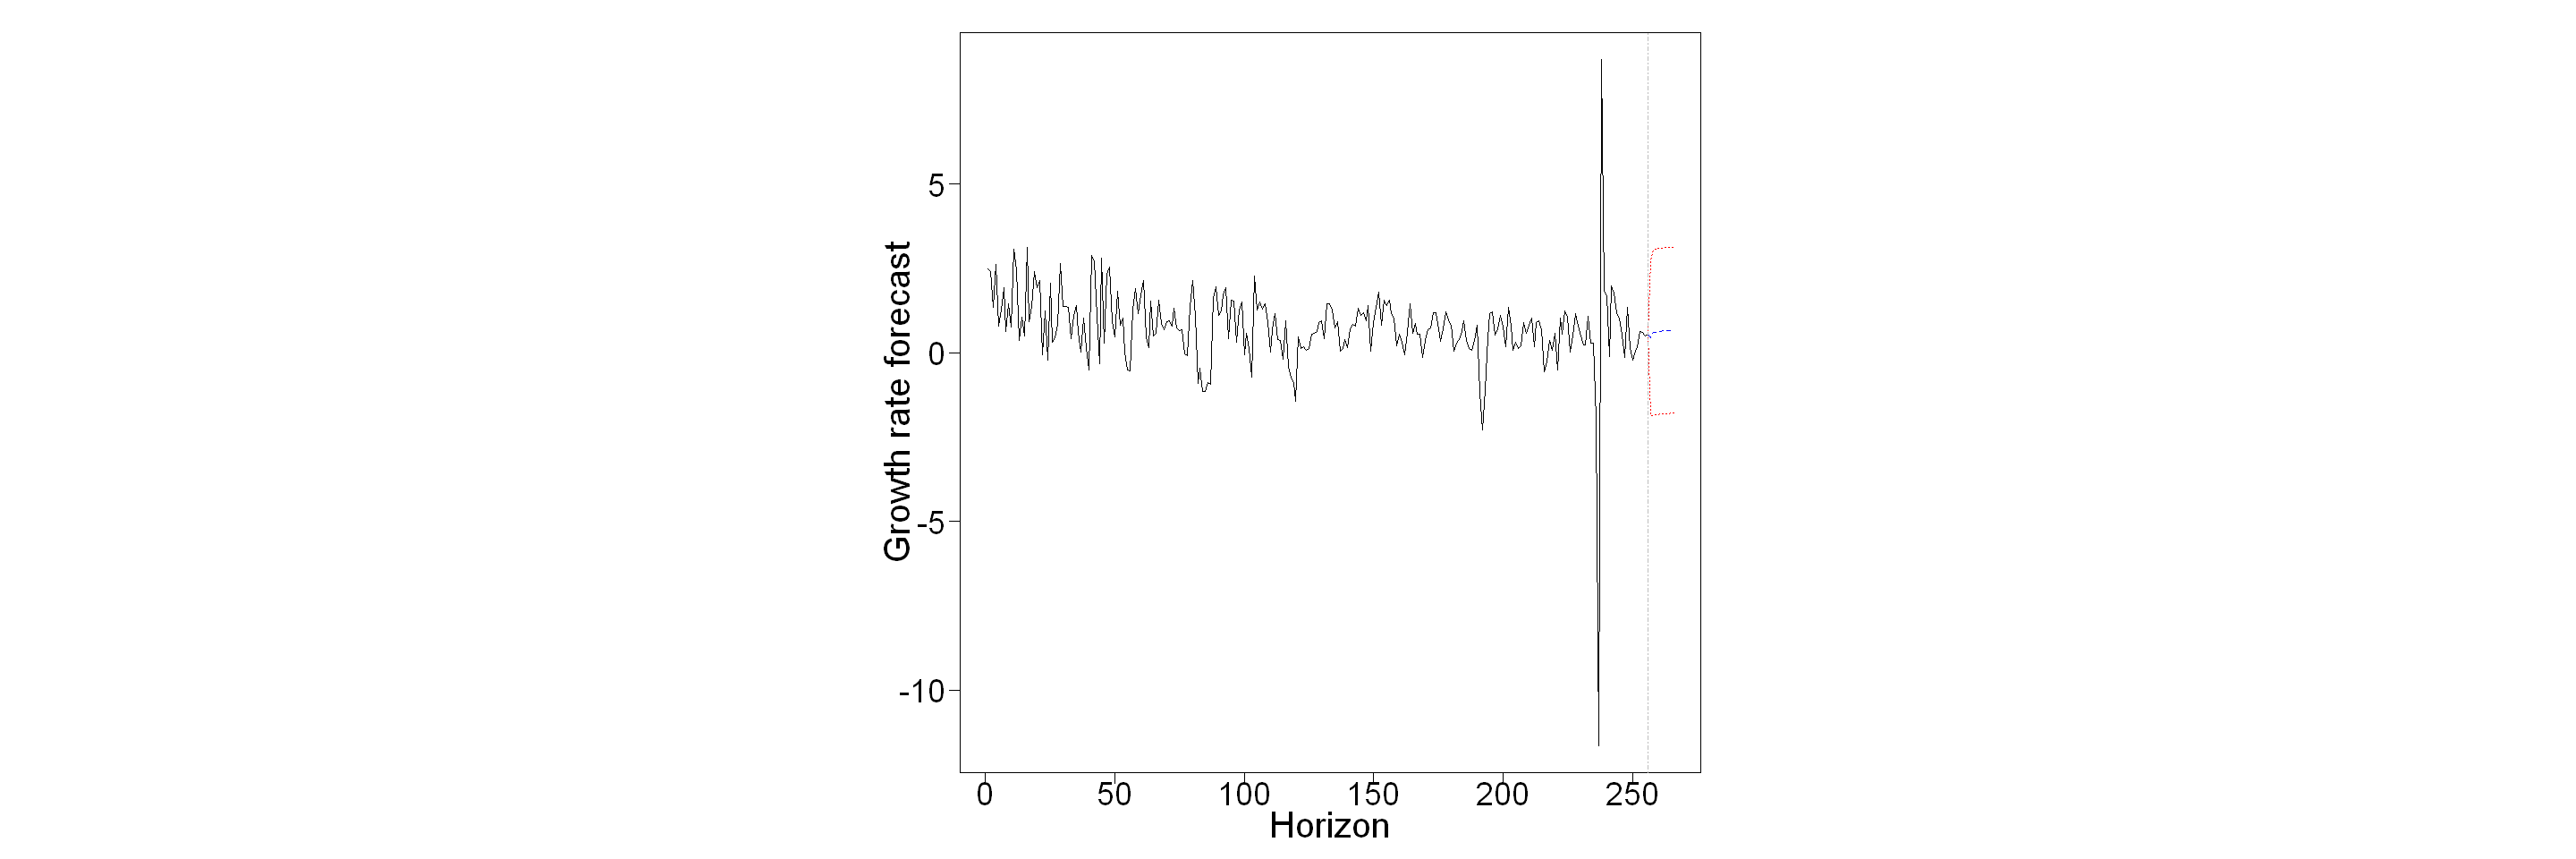

In [68]:
par(
  pty = "s",                 # square plotting region (aspect ratio ~ 1)
  cex.axis = 1.8,            # tick label size (1 = default)
  cex.lab  = 2.0,            # axis title size
  mgp = c(2.2, 0.7, 0),      # axis title, labels, line spacing
  las = 1,                   # horizontal y-axis labels
  mar = c(4, 5, 1.5, 1)     # margins: bottom, left, top, right
)

# Plot only the dgdp forecast, single panel, with your own labels
plot(
  prd,
  names     = "dgdp",        # only this variable
  plot.type = "single",      # single panel
  xlab      = "Horizon",
  ylab      = "Growth rate forecast",
  main      = ""             # remove default title
)

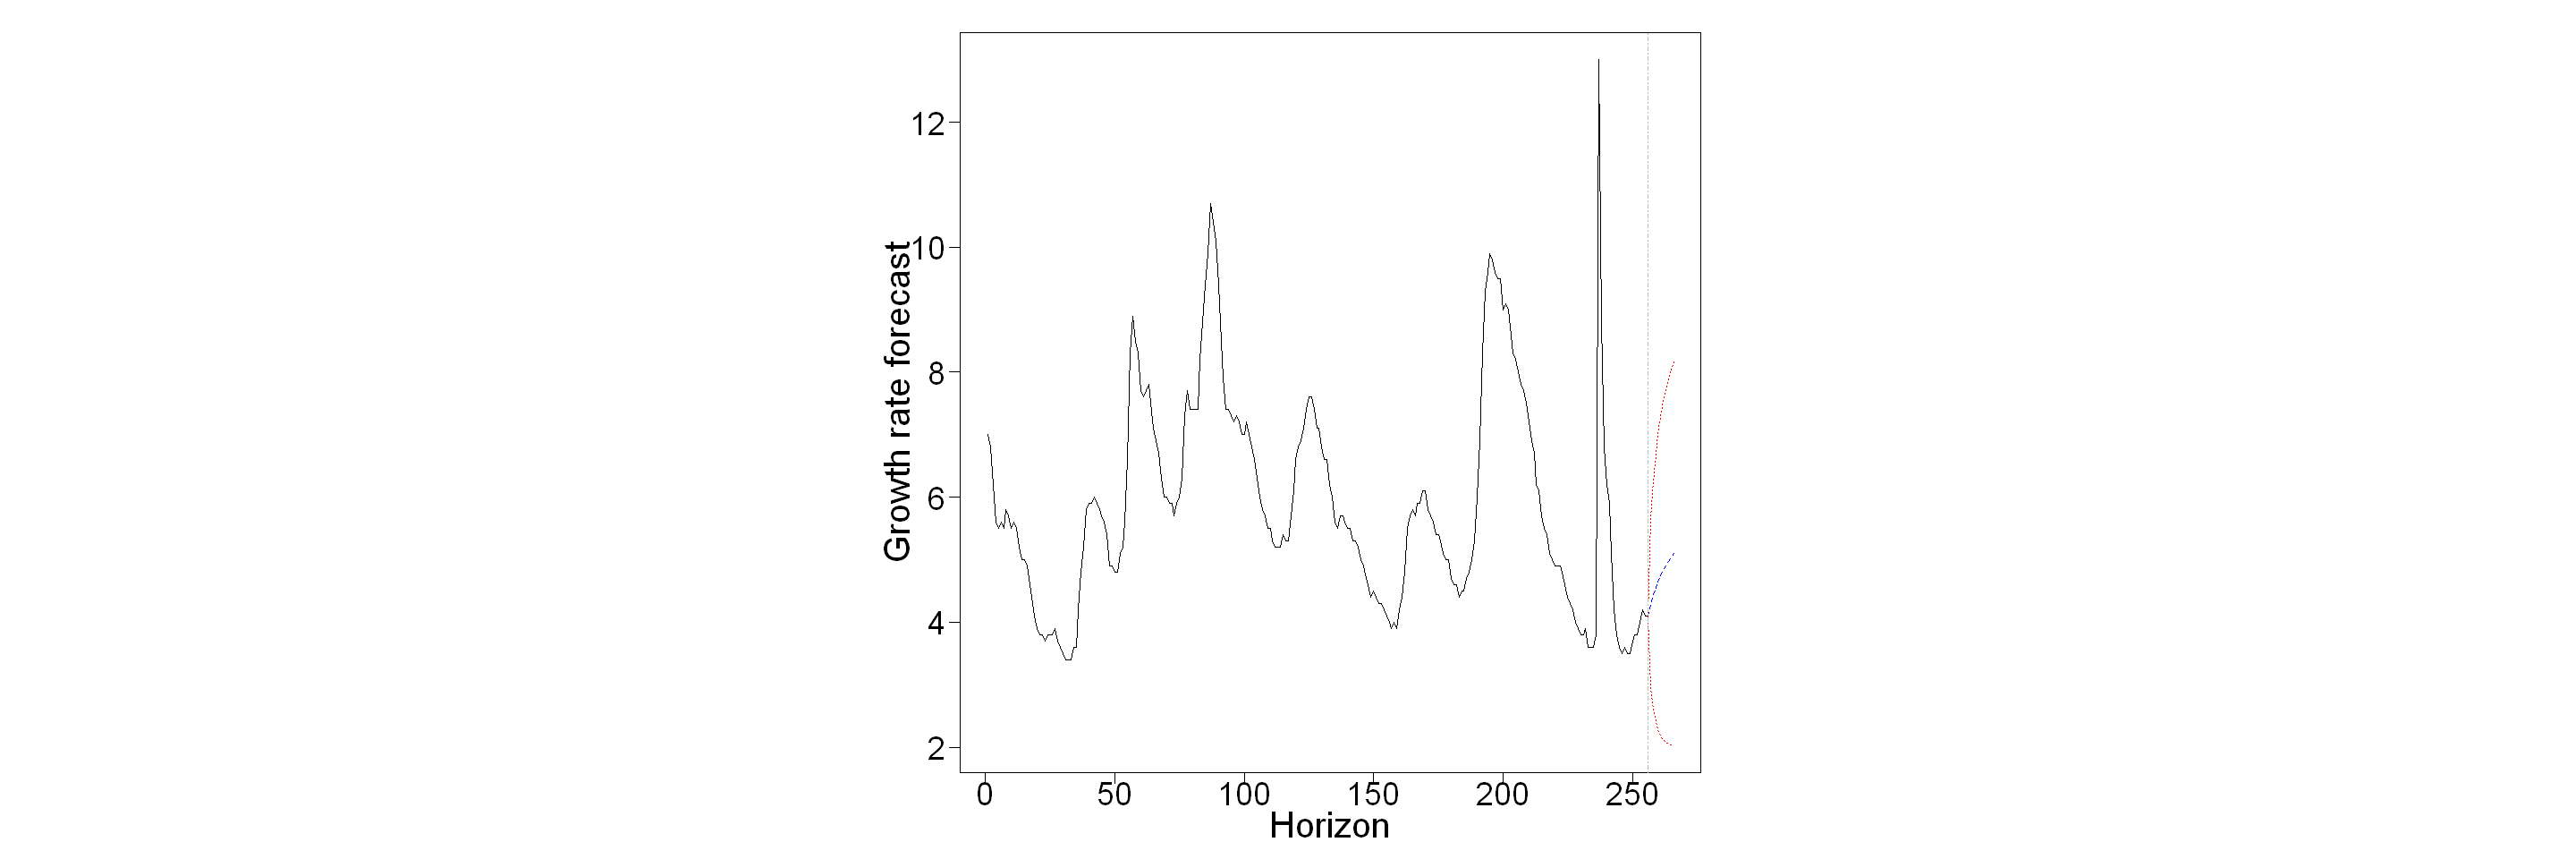

In [69]:
par(
  pty = "s",                 # square plotting region (aspect ratio ~ 1)
  cex.axis = 1.8,            # tick label size (1 = default)
  cex.lab  = 2.0,            # axis title size
  mgp = c(2.2, 0.7, 0),      # axis title, labels, line spacing
  las = 1,                   # horizontal y-axis labels
  mar = c(4, 5, 1.5, 1)      # margins: bottom, left, top, right
)

# Plot only the dgdp forecast, single panel, with your own labels
plot(
  prd,
  names     = "durate",      # only this variable
  plot.type = "single",      # single panel
  xlab      = "Horizon",
  ylab      = "Growth rate forecast",
  main      = ""             # remove default title
)